In [1]:
pip install ucimlrepo

In [ ]:
#https://archive.ics.uci.edu/dataset/73/mushroom

In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# print(mushroom.metadata)
# print(mushroom.variables)

print(X)
print(y)

     cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            x           s         n       t    p               f   
1            x           s         y       t    a               f   
2            b           s         w       t    l               f   
3            x           y         w       t    p               f   
4            x           s         g       f    n               f   
...        ...         ...       ...     ...  ...             ...   
8119         k           s         n       f    n               a   
8120         x           s         n       f    n               a   
8121         f           s         n       f    n               a   
8122         k           y         n       f    y               f   
8123         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c         b          k           e  .

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # reducing the dimensionality
from sklearn.model_selection import train_test_split

In [13]:
# categorical variables require to be one-hot encoded

X = pd.get_dummies(X)
print(f'X.shape: {X.shape}') # results in a large sparse matrix
X.head()

X.shape: (8124, 116)


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
pca = PCA(n_components=2).fit_transform(X) # reducing dimension to 2
print(f'pca.shape: {pca.shape}')
pca

pca.shape: (8124, 2)


array([[-1.12322213, -0.78160124],
       [-1.41753473,  0.12550716],
       [-1.55553437, -0.08649571],
       ...,
       [-0.51209354, -0.0331782 ],
       [ 1.47188653, -1.87343732],
       [-0.47321129, -0.02492559]])

In [27]:
y = pd.get_dummies(y).iloc[:,1]; y[:10]

0    1
1    0
2    0
3    1
4    0
5    0
6    0
7    0
8    1
9    0
Name: 1, dtype: uint8

In [28]:
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

Text(0, 0.5, 'PC2')

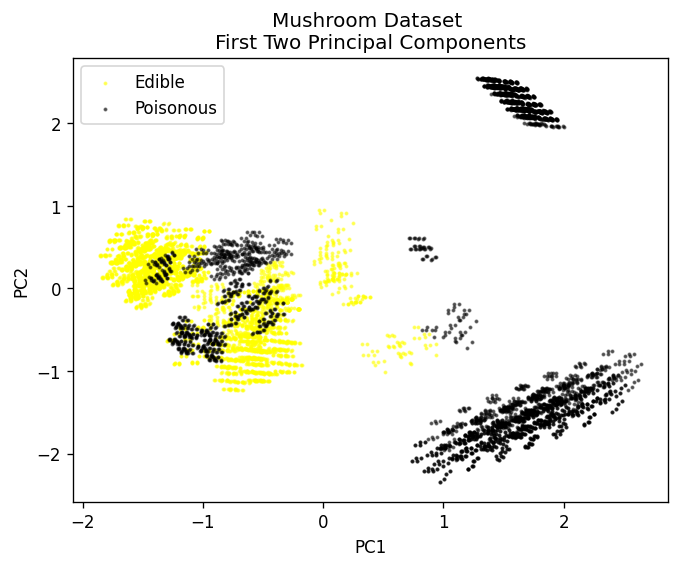

In [37]:
plt.figure(dpi=120) # higher resolution than the default dpi=100 (dots per inch)
plt.scatter(pca[y.values == 0,0], pca[y.values == 0, 1], alpha=0.5, label="Edible", s=2, c="yellow")
plt.scatter(pca[y.values == 1,0], pca[y.values == 1, 1], alpha=0.5, label="Poisonous", s=2, c="black")
plt.legend()
plt.title('Mushroom Dataset \nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.gca().set_aspect('equal') # get current axis

In [ ]:
def plot_boundary(X, y, fitted_model):
  plt.figure(figsize=(9.8, 5))

  for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
    plt.subplot(1, 2, i+1)

    mesh_step_size = 0.01
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
    # meshgrid creates coordinates
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))

    # np.ravel() == np.reshape(-1); flattening the arraya
    if i == 0:
      Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()]) # predict the class
    else:
      try:
        Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] # predict the probs for each class
        print(fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()]))
      except:
        plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                 verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
        plt.axis('off')

In [39]:
def plot_boundary(X, y, fitted_model):
  plt.figure(figsize=(9.8, 5))

  for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
    plt.subplot(1, 2, i+1)

    mesh_step_size = 0.01
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
    # meshgrid creates coordinates
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))

    # np.ravel() == np.reshape(-1); flattening the arraya
    if i == 0:
      Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()]) # predict the class
    else:
      try:
        Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] # predict the probs for each class
      except:
        plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
        plt.axis('off')
        break
    Z = Z.reshape(xx.shape)
    plt.scatter(X[y.values == 0, 0], X[y.values == 0, 1], alpha=0.4, label="Edible", s=5)
    plt.scatter(X[y.values == 1, 0], X[y.values == 1, 1], alpha=0.4, label="Poisonous", s=5)
    plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, extent=(x_min, x_max, y_min, y_max), origin='lower')
    plt.title(plot_type + '\n' + str(fitted_model).split('(')[0] + ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y),5)))
    plt.gca().set_aspect('equal');

  plt.tight_layout()
  plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

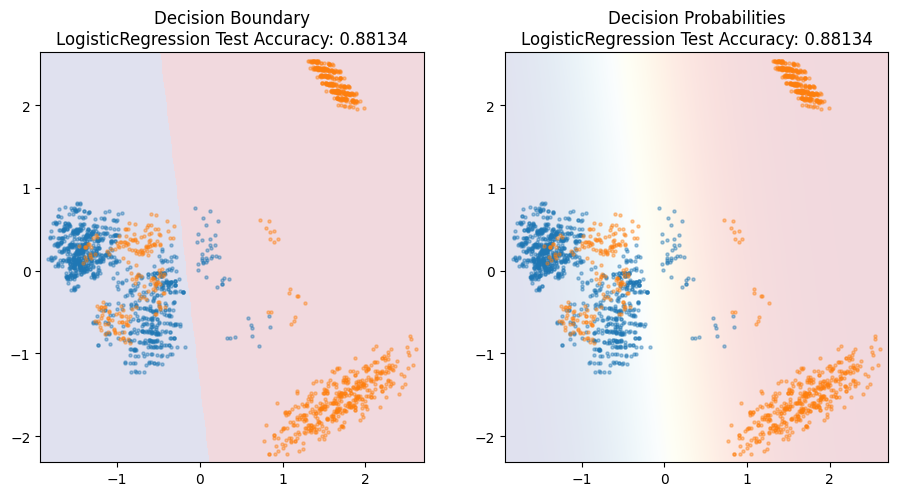

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

plot_boundary(X_test, y_test, model)

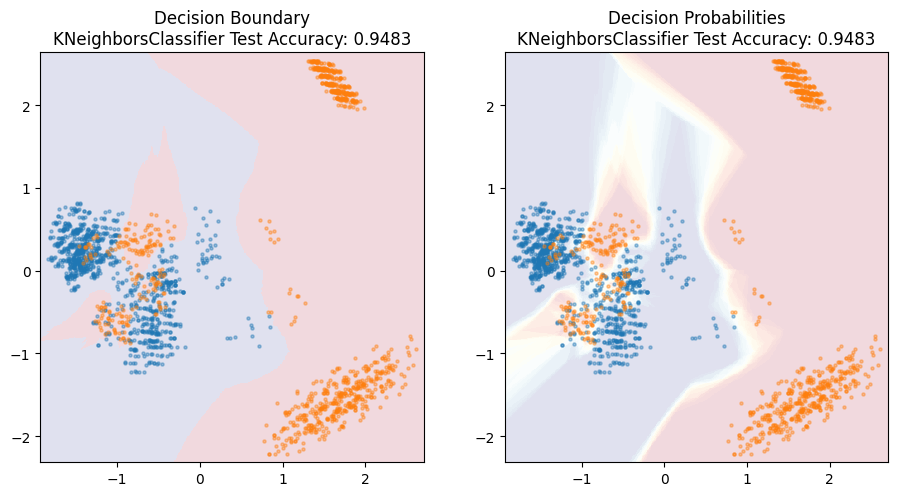

In [41]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)

plot_boundary(X_test, y_test, model)

Decision tree is useful to find influential features and easy to interpret.

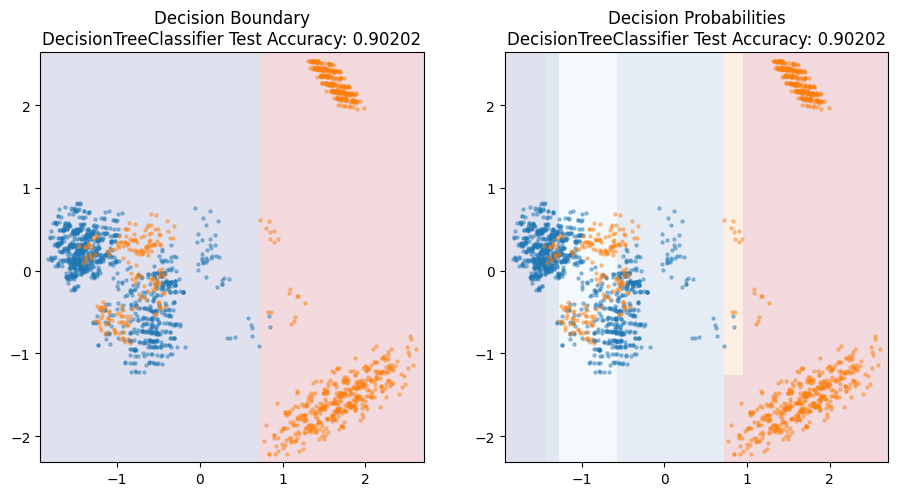

In [42]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

plot_boundary(X_test, y_test, model)

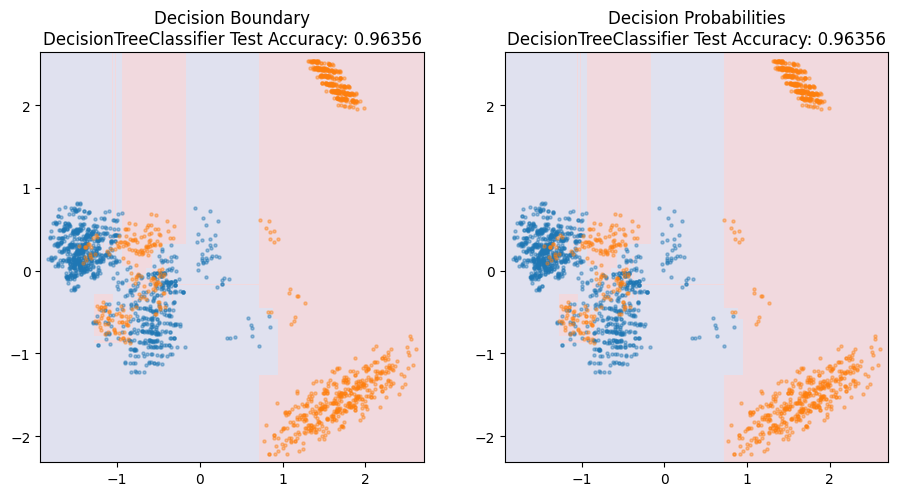

In [44]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

plot_boundary(X_test, y_test, model)

As decision tree can overfit easily, the solution that tried to solve this was an ensemble method. Ensemble combines multiple individual models to improve overall predictive performance. Random forest is a popular ensemble technique that builds multiple decision trees and merges their outputs for more accurate and stable predictions.

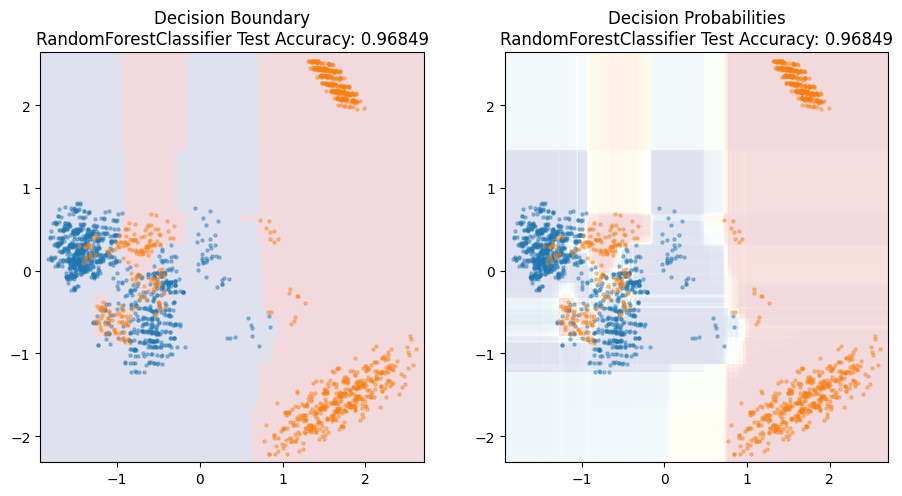

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

plot_boundary(X_test, y_test, model)

In support vector classifier, regularizing term is added on default. SVM is similar to kNN, also called as maximum margin classifier. Unlike kNN, it only remembers support vectors not all training points to make a prediction. In terms of calculating distance between points, SVM can be set to utilize kernel (e.g. RBF kernel) to compute complex decision boundaries by transforming data into higher dimension so that linear decision boundaries can separate classes.

About the regularization, penalizing $|w_j|$ is called a lasso regularization (, or L1 penalty), and penalizing $w_j^2$ is called the ridge regularization (, or L2 penalty), both to reduce the complexity of the final prediction, preventing overfitting. Regularization works well if we have relatively smaller dataset compared to the number of features. (WHY?).

Lasso will set small impact features weights to 0 and return a sparse feature matrix.

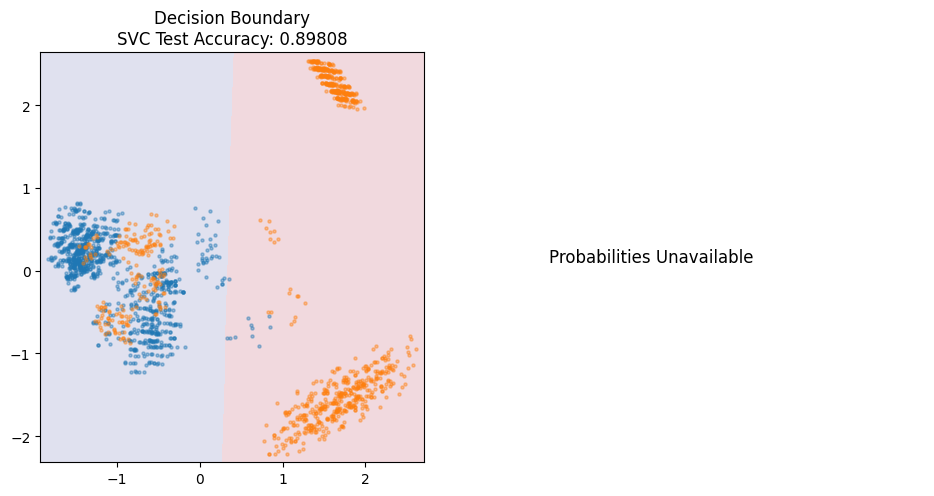

In [46]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

plot_boundary(X_test, y_test, model)

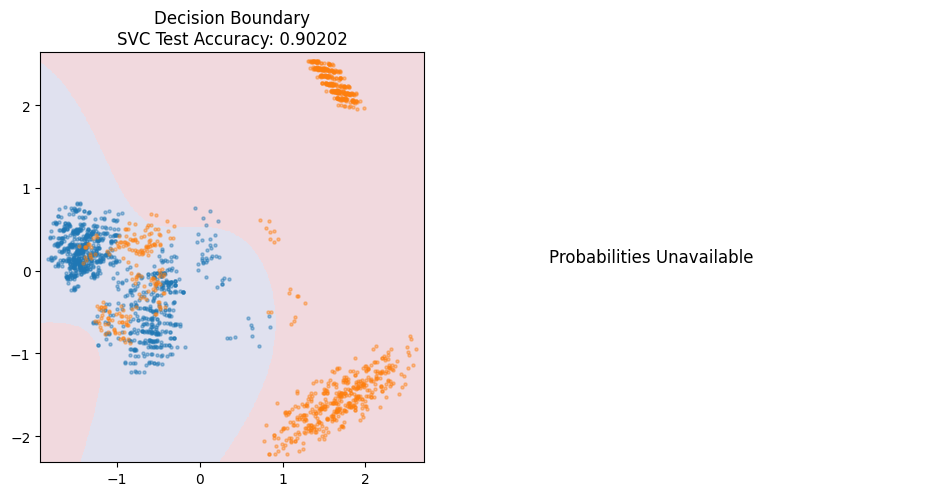

In [48]:
model = SVC(kernel='rbf', C=1) # C is a regularization parameter, default is usually set to 1
model.fit(X_train, y_train)

plot_boundary(X_test, y_test, model)

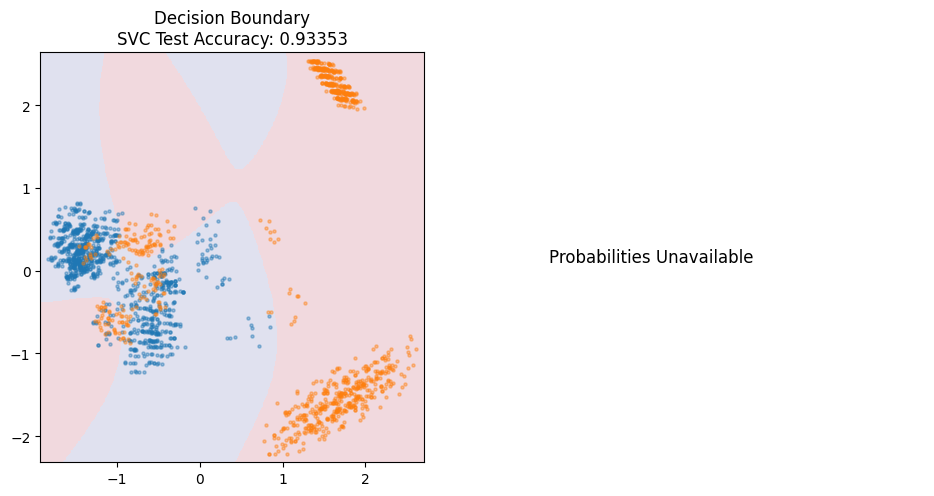

In [49]:
model = SVC(kernel='rbf', C=10)
model.fit(X_train, y_train)

plot_boundary(X_test, y_test, model)

Naive bayes will work well with continous data where the features likelihood is assumed to be Gaussian, however, the performance will be limited when the assumptions for the model are largely violated.


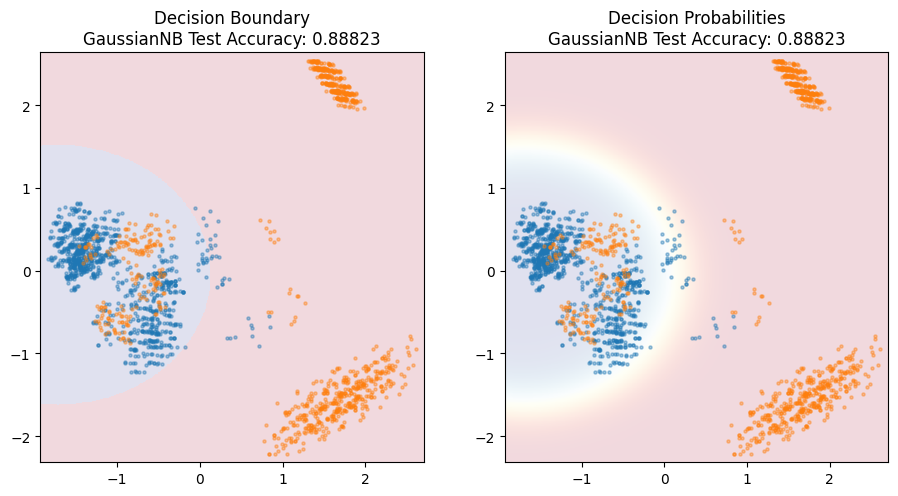

In [50]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

plot_boundary(X_test, y_test, model)

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train, y_train)

plot_boundary(X_test, y_test, model)